<h1>Deep Multiple Layered Echo State Network</h1>

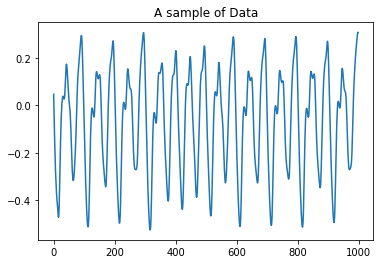

In [450]:
import matplotlib.pyplot as plt
import numpy as np
import ast
# load the data
trainLen = 2000
testLen = 2000
initLen = 100
data = []
with open('../data/MackeyGlass_t17.txt','r') as f:
    dt = f.readlines()
    for y in dt: 
        data.append(ast.literal_eval(y))
# plot some of it
plt.plot(data[1:1000])
plt.title("A sample of Data")
plt.show()


In [451]:
# Generate the ESN reservoir
inSize = 1
outSize = 1
resSize=100

# leaking rate
a = 0.4

Win = (np.random.rand(resSize,1)-0.5) * 1
W = np.random.rand(resSize,resSize)-0.5
WL1 = np.random.rand(resSize,resSize)-0.5
Wr = (np.random.rand(resSize,resSize)-0.3) 
W = W * 0.13

X = np.zeros((resSize, trainLen - initLen))
Yt = np.transpose(data[initLen+1:trainLen+1])

In [506]:
# run the reservoir with the data and collect X
x = np.zeros((resSize,1))
for t in range(1,trainLen):
    
    u = float(data[t])
    # Layer 0
    x = np.multiply((1-a),x) + \
    np.multiply(a, np.tanh(np.add(np.multiply(Win,u), np.dot(W,x))))
    # Layer 1
    x = np.multiply(a,x) + \
    np.multiply((1-a),np.tanh(np.add(np.dot(Wr,x),np.dot(WL1,x))))
   
    if t > initLen:
        X[:resSize,t-initLen] = np.transpose(x)
                


In [507]:
reg = 1e-8
X_T = np.transpose(X)
Wout = np.dot(Yt,np.linalg.pinv(X))
Wout = np.expand_dims(Wout, axis=1)

In [508]:
Y = np.transpose(np.zeros((outSize,testLen)))
u = data[trainLen+1]


In [509]:
for t in range(1,testLen):
    # Layer 0
    x = np.multiply((1-a),x) + \
    np.multiply(a, np.tanh(np.add(np.multiply(Win,u), np.dot(W,x))))
    # Layer 1
    x = np.multiply(a,x) + \
    np.multiply((1-a),np.tanh(np.add(np.dot(Wr,x),np.dot(WL1,x))))
    y = np.asscalar(np.dot(np.transpose(Wout),x))
    Y[t]=y
    u=data[trainLen+t+1]


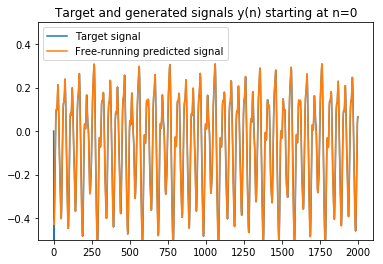

Mean Squared Error: 0.005375155214880578


In [510]:
plt.title("Target and generated signals y(n) starting at n=0")
plt.plot(Y)
plt.plot(data[trainLen+2:trainLen+testLen+1])
plt.legend(['Target signal','Free-running predicted signal'],loc='upper left')
plt.ylim(-0.5,0.5)
plt.show()
errorLen=100
mse=np.divide(np.sum(data[trainLen+2:trainLen+errorLen+1]-Y[1:errorLen])**2,errorLen)
print("Mean Squared Error:",(mse))